# Generate and test random data

Generate some random data and then perform some tests to see if the data is statistically normal.

This code is based on the following article.
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/


## Import libraries
A couple of other libraries will be added in the statistical testing sections

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Seeding the random number generator
https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do

If you want seemingly random numbers, do not set the seed value - seed(). However, there are situations where having the generator produce the same random numbers every time is useful, such as during debugging or sharing code so others can reproduce the results.

In [14]:
np.random.seed(1)

## Generate univariate observations, Gaussian data
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html

randn() returns a single random float, mean=0, variance=1

rand(number or array) returns an array

rand(100) returns an array of 100 floats

randn() is a convenience function/wrapper for MATLAB users

could also use np.random.normal

sigma * np.random.randn(...) + mu is the same as np.random.normal(loc= mu, scale= sigma, ...)

sigma * np.random.randn(...) + mu

x * randn(n) + y where x sets the standard deviation and y sets the mean

In [15]:
n = 1000 # set the number of data points
data = 5 * np.random.randn(n) + 50

## Summarize the data

In [16]:
print("Data Summary")
print("============")
mean = np.mean(data)
sdv  = np.std(data)
print("number of data points= %d" % (n))
print('mean=%.3f stdv=%.3f' % (np.mean(data), np.std(data)))
print()

Data Summary
number of data points= 1000
mean=50.194 stdv=4.905



## Visually check the data - does it look normal?

### Histograms

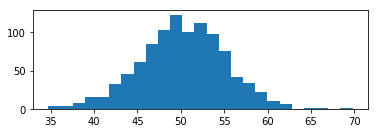

In [17]:
plt.subplot(211)
plt.hist(data, bins=25)
plt.show()

### Plot the data as a density plot, scaled (density=True turns on scaling)

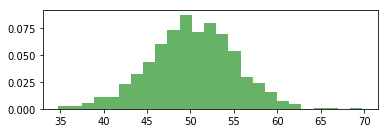

In [18]:
plt.subplot(212)
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')
plt.show()

### Fit a normal distribution to the data

In [19]:
mu, std = norm.fit(data)

### Plot the PDF
https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data


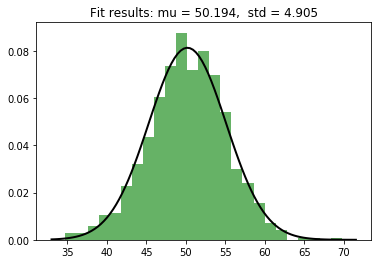

In [20]:
plt.figure(1)
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.3f,  std = %.3f" % (mu, std)
plt.title(title)
plt.show()

### QQ plot

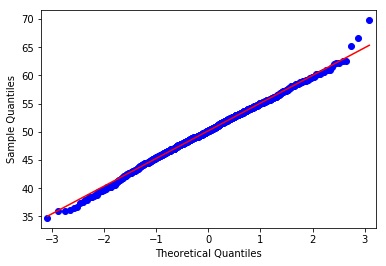

In [21]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data, line='s')
plt.show()

## Run statistical tests
The tests assume the sample was drawn from a Gaussian distribution. This is the null hypothesis, H0.

If p<=alpha then reject H0 (the data is not normal)

If p> alpha then fail to reject H0 (the data is normal)

## Shapiro-Wilk test

In [22]:
from scipy.stats import shapiro
stat, p = shapiro(data)

print("Shapiro-Wilk Test")
print("=================")
print('statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('sample looks Gaussian (fail to reject H0)')
else:
    print('sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test
statistics=0.998, p=0.250
sample looks Gaussian (fail to reject H0)


## D'Agostino k^2 test

In [23]:
from scipy.stats import normaltest
stat, p = normaltest(data)

print("D'Agostino's K^2 Test")
print("=====================")
print('statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('sample looks Gaussian (fail to reject H0)')
else:
    print('sample does not look Gaussian (reject H0)')
print()

D'Agostino's K^2 Test
statistics=2.990, p=0.224
sample looks Gaussian (fail to reject H0)



## Anderson-Darling test

In [25]:
from scipy.stats import anderson
result = anderson(data)

print("Anderson-Darling Test")
print("=====================")
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
print()

Anderson-Darling Test
Statistic: 0.370
15.000: 0.574, data looks normal (fail to reject H0)
10.000: 0.653, data looks normal (fail to reject H0)
5.000: 0.784, data looks normal (fail to reject H0)
2.500: 0.914, data looks normal (fail to reject H0)
1.000: 1.088, data looks normal (fail to reject H0)

